In [1]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split
from preprocessing import *
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [2]:
#Fitting K-NN classifier to the training set  
classifier= KNeighborsClassifier(n_neighbors=25 )  
classifier.fit(X_train_balanced, y_train_balanced)  

KNeighborsClassifier(n_neighbors=25)

In [3]:
y_pred_train = classifier.predict(X_train_balanced)  
y_pred_val = classifier.predict(X_val)  
y_pred_test = classifier.predict(X_test)  

In [4]:
from sklearn.metrics import accuracy_score 
print("Acc Train", accuracy_score(y_train_balanced, y_pred_train))
print("Acc Val", accuracy_score(y_val, y_pred_val))
print("Acc Test",accuracy_score(y_test, y_pred_test))

Acc Train 0.8009708737864077
Acc Val 0.8
Acc Test 0.8104304635761589


In [5]:
#Predicting the test set result  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred_test)
cm

array([[129,  52],
       [177, 850]], dtype=int64)

In [6]:
import matplotlib.pyplot as plt

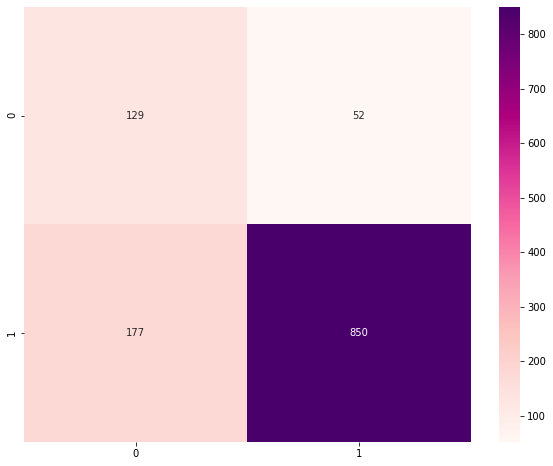

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = '0.0f', cmap= 'RdPu')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

NameError: name 'x_train' is not defined